This program aims to predict whether a star is a pulsar star given the pulsar_stars.csv data. The prediction is done using a Multi-Layer Perceptron classifier (MLPClassifer) algorithm and a LogisticRegression algorithm. The data required no cleaning, and the features were correlated nicely, resulting in both algorithms giving a ~0.98 precision. Further refining would require reading the paper explaining how the data was collected, and weighting features according towhich features are the most physically relevant. As opposed to weighing features based on the correlation heat map.

This data comes from a study of pulsar stars: 'The High Time Resolution Universe Pulsar Survey - I. System Configuration and Initial Discoveries'. This particular set gives the physical characteristics of stars and states whether the star is a pulsar star or not.

We begin by loading the data into a pandas data frame. Then print the info of the data frame to see what kind of cleaning and organizing needs to be done to the data.

In [1]:
# Import necessary packages
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
df = pd.read_csv('pulsar_stars.csv')
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17898 entries, 0 to 17897
Data columns (total 9 columns):
 Mean of the integrated profile                  17898 non-null float64
 Standard deviation of the integrated profile    17898 non-null float64
 Excess kurtosis of the integrated profile       17898 non-null float64
 Skewness of the integrated profile              17898 non-null float64
 Mean of the DM-SNR curve                        17898 non-null float64
 Standard deviation of the DM-SNR curve          17898 non-null float64
 Excess kurtosis of the DM-SNR curve             17898 non-null float64
 Skewness of the DM-SNR curve                    17898 non-null float64
target_class                                     17898 non-null int64
dtypes: float64(8), int64(1)
memory usage: 1.2 MB


,Mean of the integrated profile,Standard deviation of the integrated profile,Excess kurtosis of the integrated profile,Skewness of the integrated profile,Mean of the DM-SNR curve,Standard deviation of the DM-SNR curve,Excess kurtosis of the DM-SNR curve,Skewness of the DM-SNR curve,target_class
0,140.562500,55.683782,-0.234571,-0.699648,3.199833,19.110426,7.975532,74.242225,0
1,102.507812,58.882430,0.465318,-0.515088,1.677258,14.860146,10.576487,127.393580,0
2,103.015625,39.341649,0.323328,1.051164,3.121237,21.744669,7.735822,63.171909,0
3,136.750000,57.178449,-0.068415,-0.636238,3.642977,20.959280,6.896499,53.593661,0
4,88.726562,40.672225,0.600866,1.123492,1.178930,11.468720,14.269573,252.567306,0


Fortunately, the data set is completly filled with numeric values, and no null entries. Our analysis can begin without data cleaning. First, plot a heatmap of the correlation between each of the features in the data frame. This tells us what features can be dropped from the predictive analysis because they aren't strongly correlated with the target feature.

<function matplotlib.pyplot.show(*args, **kw)>

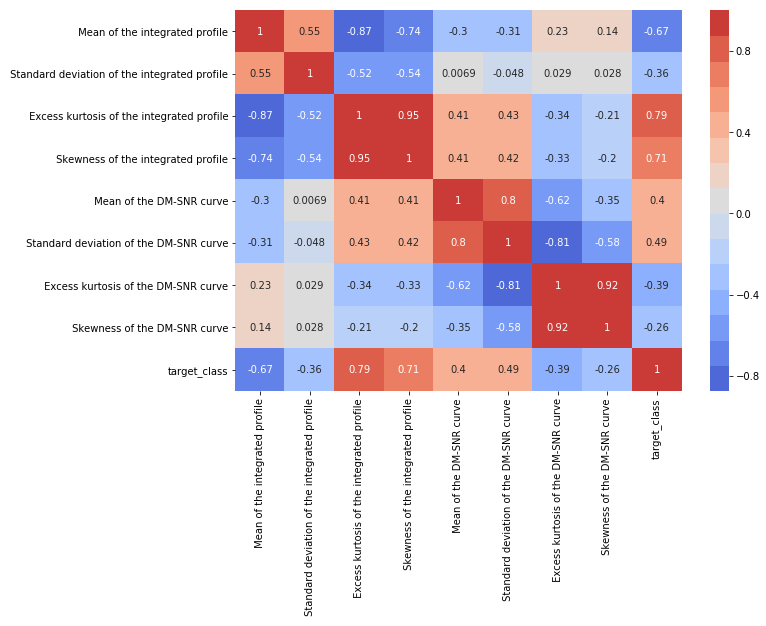

In [3]:
plt.figure(figsize=(10, 7))
sns.heatmap(df.corr(), annot=True, cmap=sns.color_palette('coolwarm', 15))
plt.show

We're interested in the row labeled 'target_class'. Each of the values shown gives the relative correlation between the given feature and the 'target_class' feature. The values range from -1.0 (negatively correlated) and 1.0 (positively correlated). We can choose our data set and target set from this. The threshold for determining which features to drop is somewhat arbitrary. None of the features in this set are entirely uncorrelated with the 'target_class' feature (correlation = 0.0), so it's not necessary to drop any of them. The results of the predictive analysis are not significantly changed by dropping any of the features. Dropping the least correlated features results in roughly 0.98 precision, while not dropping any features still results in a 0.98 precision. However, this doesn't consider the physics of determining a non-pulsar star from a pulsar star. Some of the features may be more physically relevant than others, but that cannot be determined by playing with the model. I digress. Continuing with the classification, we can now choose the data set and target set.

In [4]:
# Choose data set. Exclude the target set from the data
X = df.drop('target_class', axis=1)
# Choose target set
y = df['target_class']

# Split data into random training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y)

# Create an object of the standard scaler from sklearn
scaler = StandardScaler()
# Fit the standard scalar to the training data
scaler.fit(X_train)

# Use the transform function to normalize the data sets
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

Now the data is ready to be tested with a model. For the first example we use a multi-layer perceptron algorithm. In particular, we use the MLPClassifier class.

In [5]:
# Create the MLP model with 2 layers, and as many neurons as there are features in the data set
mlp = MLPClassifier(hidden_layer_sizes=(8, 8))

# Fit the training data to the MLP model
mlp.fit(X_train, y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=(8, 8), learning_rate='constant',
       learning_rate_init=0.001, max_iter=200, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=None,
       shuffle=True, solver='adam', tol=0.0001, validation_fraction=0.1,
       verbose=False, warm_start=False)

With the training data fit to the model, we can predict the results.

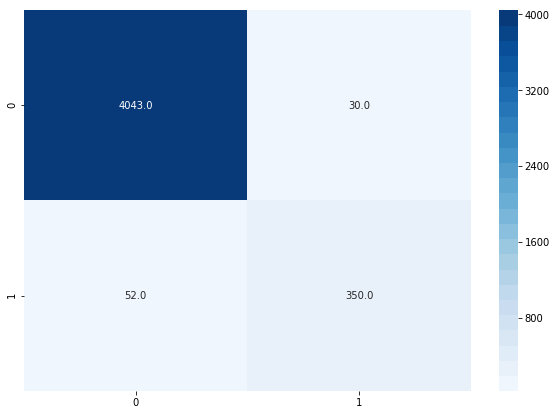

[[4043   30]
 [  52  350]]
             precision    recall  f1-score   support

          0       0.99      0.99      0.99      4073
          1       0.92      0.87      0.90       402

avg / total       0.98      0.98      0.98      4475



In [6]:
# Make predictions on the data set using the MLP model
prediction = mlp.predict(X_test)

# Print results and analytics of the prediction
plt.figure(figsize=(10,7))
sns.heatmap(confusion_matrix(y_test, prediction), annot=True, fmt='.1f', cmap=sns.color_palette("Blues", 25))
plt.show()

print(confusion_matrix(y_test, prediction))
print(classification_report(y_test, prediction))